### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

#### (1) 我们的自变量是什么？因变量是什么？

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df_stroopdata = pd.read_csv("stroopdata.csv")
df_stroopdata.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


自变量：文字和颜色是否不一致 <br>
因变量：正确读出文字耗时多久 <br>

#### (2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

定义 u1：Congruent的总体耗时均值， u2：Incongruent的总体耗时均值 <br>

使用配对t检验，因为每次做实验的人是同一个人，所以该样本是相依样本。并且该样本是配对样本 <br>

H0:字的颜色**不会**影响我们对字的认识  即 `u1-u2 >= 0` <br>

H1:字的颜色**会**影响我们对字的认识 即  `u1-u2 < 0` 

#### (3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [8]:
df_stroopdata.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Congruent 的平均耗时：14.051125 <br>
Incongruent的平均耗时：22.015917 <br>
<br><br>
Congruent 的中位数：14.356500  <br>
Incongruent中位数：21.017500 <br>
<br><br>
Congruent 的标准差：3.559358 <br>
Incongruent的标准差：4.797057

#### (4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

Text(0,0.5,'hao shi')

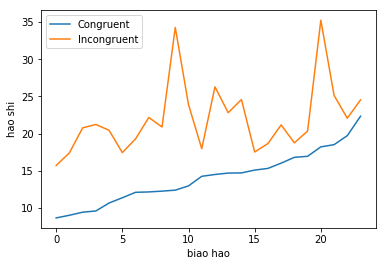

In [9]:
temp = df_stroopdata.sort_values(by='Congruent')
plt.plot(range(0, len(temp)), temp['Congruent'])

# temp = df_stroopdata['Incongruent'].sort_values()
plt.plot(range(0, len(temp)), temp['Incongruent'])
plt.legend()
plt.xlabel("biao hao")
plt.ylabel("hao shi")

对于每一个条数据，‘文字和颜色相符’的耗时总是少于‘颜色和文字不相符’

#### (5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

显著水平 = 0.05 <br>
自由度 = 23 <br>
使用单尾检测 <br>
t临界值是 1.714

#### T检验法

In [10]:
from scipy import stats
temp, p_v = stats.ttest_rel(df_stroopdata['Congruent'], df_stroopdata['Incongruent'])
print('p值=', p_v/2) # 除以2得单尾

p_value= 2.051500292855589e-08


结论：因为p值在0.05范围内，所以我们拒绝0假设。**因此颜色和文字不一致时，会影响我们判断。**

#### ~~置换检验法~~

~~根据样本数据得知`u1-u2`约等于-8，那么求出`p(x<=-8)=?`~~

In [11]:
# import numpy as np

# # 第一步将所有数据合并成一个列表
# temp_all_values = list(df_stroopdata['Congruent'])
# temp_all_values +=(list(df_stroopdata['Incongruent']))

# mean_differences = []
# n = 999999

# for i in range(n):
#     '''
#         将数据随机分成两组
#         此操作重复n次
#     '''
#     group_a = []
#     group_b = []
#     for value in temp_all_values:
#         assignment_chance = np.random.rand()
#         if assignment_chance >= 0.5:
#             group_a.append(value)
#         else:
#             group_b.append(value)
#     iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
#     mean_differences.append(iteration_mean_difference)
    
# plt.hist(mean_differences)
# plt.show()

In [12]:
# temp_sum = 0
# for v in mean_differences:
#     if v <= -8:
#         temp_sum += 1
# print('p(x<=-8)=',temp_sum/n)

~~结论：p value是等于0的，拒绝0假设。也可以看出这个`u1-u2=-8`是十分罕见的，所以并不是随随便便就能得到-8的。 <br>
**因此颜色和文字不一致时，会影响我们判断。**~~

~~参考 <br>
置换检测 https://www.plob.org/article/3176.html~~